In [60]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import warnings 
warnings.filterwarnings('ignore')

In [99]:
trainDf=pd.read_csv('train_yaOffsB.csv')
testDf=pd.read_csv('test_pFkWwen.csv')
trainOrg=trainDf.copy()
testOrg=testDf.copy()

In [100]:
trainDf['Crop_Damage'].value_counts()

0    74238
1    12307
2     2313
Name: Crop_Damage, dtype: int64

In [101]:
trainDf.head(5)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


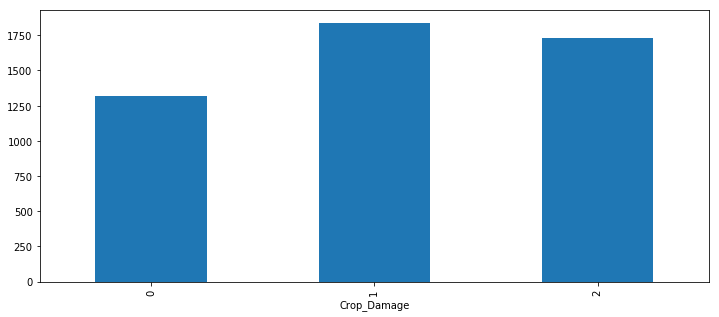

In [102]:
trainDf.groupby('Crop_Damage')['Estimated_Insects_Count'].mean().plot.bar(figsize=(12,5))

In [103]:
trainDf.groupby('Pesticide_Use_Category')['Crop_Damage'].value_counts()

Pesticide_Use_Category  Crop_Damage
1                       1                554
                        2                165
                        0                118
2                       0              56958
                        1               6072
                        2                679
3                       0              17162
                        1               5681
                        2               1469
Name: Crop_Damage, dtype: int64

Intersting the damage is more than the cure when we use pesticide category '1'

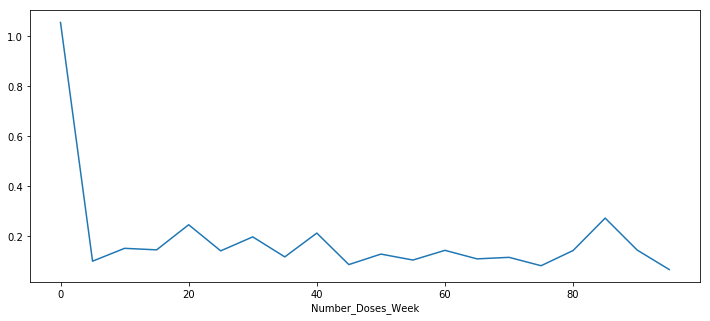

In [104]:
trainDf.groupby('Number_Doses_Week')['Crop_Damage'].mean().plot(figsize=(12,5))

Its clear if we use more number of doses the chance of crop damage is less, but interestingly there slight peak at end 
so over doses might also lead to crop damage

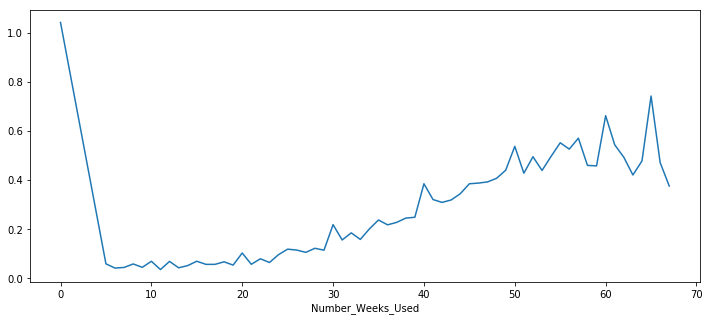

In [105]:
trainDf.groupby('Number_Weeks_Used')['Crop_Damage'].mean().plot(figsize=(12,5))

In this we can observe that optimal number of weeks should be between 5-30, if it is high or low it may lead to damage.

In [106]:
trainDf.loc[trainDf['Number_Weeks_Used'].isna(),'Number_Weeks_Used']=trainDf['Number_Weeks_Used'].mean()

In [107]:
testDf.loc[testDf['Number_Weeks_Used'].isna(),'Number_Weeks_Used']=testDf['Number_Weeks_Used'].mean()

In [108]:
Xtrainset=trainDf[['Pesticide_Use_Category','Number_Doses_Week','Number_Weeks_Used']]
Ytrainset=trainDf[['Crop_Damage']].astype(int)

In [73]:
X_train,X_test,y_train,y_test=train_test_split(Xtrainset,Ytrainset,test_size=0.20)

In [74]:
## nromalization to scale the data (x-xmin/xmax-xmin)
X_train_norm,X_test_norm=preprocessing.normalize(X_train),preprocessing.normalize(X_test)

In [75]:
classifiers=[LogisticRegression(multi_class='ovr'),RandomForestClassifier()]

In [76]:
for clf in classifiers:
    scores = cross_val_score(clf, X_train_norm, y_train, cv=5)
    print(scores)

[0.85195865 0.85427949 0.8530529  0.8540377  0.85375633]
[0.85631901 0.85561573 0.85572594 0.85347496 0.85980585]


In [77]:
from xgboost import XGBClassifier 
from catboost import CatBoostClassifier

In [78]:
classifiers2 = [XGBClassifier(max_depth=5, objective='multi:softprob', n_estimators=100, 
                        num_classes=3),CatBoostClassifier(iterations=10,
                           learning_rate=1,
                           depth=2,
                           loss_function='MultiClass')]
for clf in classifiers2:
    scores = cross_val_score(clf, X_train_norm, y_train, cv=5)
    print(scores)

[0.85856952 0.85702229 0.85635903 0.85635903 0.86121272]
0:	learn: 0.4885178	total: 21ms	remaining: 189ms
1:	learn: 0.4610306	total: 36.7ms	remaining: 147ms
2:	learn: 0.4501351	total: 50.4ms	remaining: 117ms
3:	learn: 0.4438004	total: 64.6ms	remaining: 96.9ms
4:	learn: 0.4426409	total: 81.4ms	remaining: 81.4ms
5:	learn: 0.4407587	total: 103ms	remaining: 68.6ms
6:	learn: 0.4389116	total: 119ms	remaining: 50.8ms
7:	learn: 0.4381211	total: 132ms	remaining: 33ms
8:	learn: 0.4378047	total: 147ms	remaining: 16.3ms
9:	learn: 0.4370864	total: 163ms	remaining: 0us
0:	learn: 0.4869690	total: 23.4ms	remaining: 210ms
1:	learn: 0.4530098	total: 42.1ms	remaining: 168ms
2:	learn: 0.4452315	total: 59.6ms	remaining: 139ms
3:	learn: 0.4429716	total: 76.9ms	remaining: 115ms
4:	learn: 0.4408937	total: 88.1ms	remaining: 88.1ms
5:	learn: 0.4399346	total: 105ms	remaining: 69.9ms
6:	learn: 0.4379556	total: 120ms	remaining: 51.6ms
7:	learn: 0.4363675	total: 138ms	remaining: 34.6ms
8:	learn: 0.4353436	total: 15

In [109]:
tot_train=preprocessing.normalize(Xtrainset)
tot_test=preprocessing.normalize(testDf[['Pesticide_Use_Category','Number_Doses_Week','Number_Weeks_Used']])

In [110]:
Xgmodel=XGBClassifier(max_depth=5, objective='multi:softprob', n_estimators=100, 
                        num_classes=3)
xg=Xgmodel.fit(tot_train,Ytrainset)
testDf['Crop_Damage']=xg.predict(tot_test)

In [111]:
agri_sub=testDf[['ID','Crop_Damage']]

In [112]:
agri_sub.to_csv('agri_basic.csv',index=False)